In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D,Flatten, LeakyReLU
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam, SGD

In [52]:
training = pd.read_csv('all/training.csv')
test = pd.read_csv('all/test.csv')

In [53]:
def get_img(df):
    imgs = []
    img = df.iloc[:,-1].str.split(' ')
    for j in range(0,df.shape[0]):
        im = [0 if i=='' else i for i in img[j]]
        imgs.append(im)
    imgs = np.array(imgs, dtype=float).reshape(-1,96,96,1)
    return imgs

In [55]:
X = get_img(training)/255

In [58]:
Y = np.array(training.drop('Image', axis=1).fillna(method='ffill'),dtype=np.float32)

In [59]:
X_test = get_img(test)/255

In [68]:
def image(i):
    img = X[...,0][i]
    plt.imshow(img, 'gray')
    pt = np.vstack(np.split(Y[i],15)).T
    plt.scatter(pt[0],pt[1],c='red',marker = 'x')

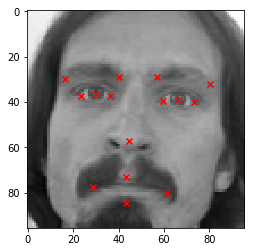

In [69]:
image(0)

In [93]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (96,96,1)))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(128, activation = "relu"))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(30))

In [97]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer='adam', loss = 'mse', metrics=['mae','accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 96, 96, 32)        832       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 73728)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               18874624  
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
__________

In [98]:
model.fit(X, Y, epochs=100, batch_size=128,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/100
5639/5639 [==============================] - 4s 633us/step - loss: 44.1200 - mean_absolute_error: 4.9606 - acc: 0.5935 - val_loss: 6.3364 - val_mean_absolute_error: 1.6231 - val_acc: 0.6872
Epoch 2/100
5639/5639 [==============================] - 3s 476us/step - loss: 41.9095 - mean_absolute_error: 4.8193 - acc: 0.6006 - val_loss: 10.6857 - val_mean_absolute_error: 2.3673 - val_acc: 0.6872
Epoch 3/100
5639/5639 [==============================] - 3s 476us/step - loss: 41.0719 - mean_absolute_error: 4.7580 - acc: 0.6001 - val_loss: 7.9990 - val_mean_absolute_error: 1.9081 - val_acc: 0.6872
Epoch 4/100
5639/5639 [==============================] - 3s 476us/step - loss: 42.7544 - mean_absolute_error: 4.8632 - acc: 0.5974 - val_loss: 7.3910 - val_mean_absolute_error: 1.7738 - val_acc: 0.6872
Epoch 5/100
5639/5639 [==============================] - 3s 476us/step - loss: 40.3199 - mean_absolute_error: 4.7250 - acc: 0.5863 - val_loss: 

Epoch 41/100
5639/5639 [==============================] - 3s 476us/step - loss: 31.4449 - mean_absolute_error: 4.1460 - acc: 0.6052 - val_loss: 6.2363 - val_mean_absolute_error: 1.5773 - val_acc: 0.6872
Epoch 42/100
5639/5639 [==============================] - 3s 476us/step - loss: 30.8688 - mean_absolute_error: 4.0933 - acc: 0.6052 - val_loss: 5.8198 - val_mean_absolute_error: 1.4665 - val_acc: 0.6872
Epoch 43/100
5639/5639 [==============================] - 3s 475us/step - loss: 31.1216 - mean_absolute_error: 4.1025 - acc: 0.6052 - val_loss: 6.6909 - val_mean_absolute_error: 1.6799 - val_acc: 0.6872
Epoch 44/100
5639/5639 [==============================] - 3s 477us/step - loss: 30.6304 - mean_absolute_error: 4.0771 - acc: 0.6052 - val_loss: 6.0659 - val_mean_absolute_error: 1.5464 - val_acc: 0.6872
Epoch 45/100
5639/5639 [==============================] - 3s 476us/step - loss: 30.4909 - mean_absolute_error: 4.0598 - acc: 0.6052 - val_loss: 6.0812 - val_mean_absolute_error: 1.5367 - v

5639/5639 [==============================] - 3s 479us/step - loss: 27.7425 - mean_absolute_error: 3.8568 - acc: 0.6386 - val_loss: 6.4999 - val_mean_absolute_error: 1.6052 - val_acc: 0.6709
Epoch 82/100
5639/5639 [==============================] - 3s 480us/step - loss: 28.5227 - mean_absolute_error: 3.9384 - acc: 0.6356 - val_loss: 6.3515 - val_mean_absolute_error: 1.5829 - val_acc: 0.6709
Epoch 83/100
5639/5639 [==============================] - 3s 478us/step - loss: 28.9283 - mean_absolute_error: 3.9583 - acc: 0.6506 - val_loss: 5.0600 - val_mean_absolute_error: 1.2321 - val_acc: 0.6830
Epoch 84/100
5639/5639 [==============================] - 3s 478us/step - loss: 28.6872 - mean_absolute_error: 3.9502 - acc: 0.6519 - val_loss: 5.3884 - val_mean_absolute_error: 1.3374 - val_acc: 0.6794
Epoch 85/100
5639/5639 [==============================] - 3s 476us/step - loss: 27.7810 - mean_absolute_error: 3.8976 - acc: 0.6436 - val_loss: 6.4050 - val_mean_absolute_error: 1.6148 - val_acc: 0.669

In [108]:
Y_pred = model.predict(X_test)
Y_pred

array([[64.75142 , 36.448647, 29.12632 , ..., 70.583954, 46.082336,
        80.16478 ],
       [65.78961 , 37.158157, 29.79264 , ..., 73.27896 , 47.563416,
        79.7512  ],
       [64.994255, 36.682674, 29.524302, ..., 71.32974 , 46.73668 ,
        79.596176],
       ...,
       [66.01998 , 37.60055 , 30.567036, ..., 75.8642  , 49.210785,
        77.00016 ],
       [65.07104 , 36.83236 , 29.563496, ..., 73.350685, 47.40931 ,
        78.00326 ],
       [66.10515 , 37.534725, 30.330727, ..., 75.326965, 48.764412,
        78.08841 ]], dtype=float32)

In [109]:
def image_(i):
    img = X_test[...,0][i]
    plt.imshow(img, 'gray')
    pt = np.vstack(np.split(Y_pred[i],15)).T
    plt.scatter(pt[0],pt[1],c='red',marker = 'x')

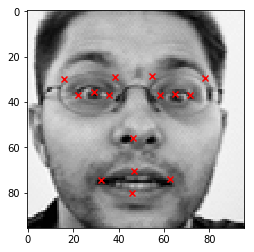

In [110]:
image_(0)

In [117]:
look_id = pd.read_csv('all/IdLookupTable.csv')

In [118]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [119]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

In [114]:
df = look_id.copy()

location = pd.DataFrame({'Location':[]})
for i in range(1,1784):
    ind = df[df.ImageId==i].location_id
    location = location.append(pd.DataFrame(pred[i-1][list(ind)],columns=['Location']), ignore_index=True)

In [121]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(Y_pred)

In [122]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [123]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [124]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [125]:
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)

In [126]:
submission.to_csv('face_key_detection_submission.csv',index = False)